# [Supervised Learning with `scikit-learn`](https://www.datacamp.com/completed/statement-of-accomplishment/course/59ae300b34ff870bc362fb7c845f68f749c1fee4)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/courses/supervised_learning_with_sklearn/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/datacamp/blob/main/notebooks/courses/supervised_learning_with_sklearn/notebook.ipynb)

**Contents**
- [Classification](#Classification)
- [Regression](#Regression)
- [Fine-tuning](#Fine-tuning)
- [Preprocessing and Pipelines](#Preprocessing-and-Pipelines)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [2]:
churn = pd.read_csv("churn.csv")
display(churn.head())


,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0


In [3]:
diabetes = pd.read_csv("diabetes.csv")
display(diabetes.head())


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
music = pd.read_csv("music.csv")
display(music.head())


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,41.0,0.6440,0.823,236533.0,0.814,0.687000,0.1170,-5.611,0.1770,102.619000,0.649,Jazz
1,62.0,0.0855,0.686,154373.0,0.670,0.000000,0.1200,-7.626,0.2250,173.915000,0.636,Rap
2,42.0,0.2390,0.669,217778.0,0.736,0.000169,0.5980,-3.223,0.0602,145.061000,0.494,Electronic
3,64.0,0.0125,0.522,245960.0,0.923,0.017000,0.0854,-4.560,0.0539,120.406497,0.595,Rock
4,60.0,0.1210,0.780,229400.0,0.467,0.000134,0.3140,-6.645,0.2530,96.056000,0.312,Rap


In [5]:
sales = pd.read_csv("sales.csv")
display(sales.head())


,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


## Classification

_Supervised learning_ is one of the three fields of machine learning, with the others being _unsupervised learning_ and _reinforcement learning_.

Supervised learning is the process whereby a model is trained using labeled data. The model learns the relationships between the target variable and the features of the dataset. Once trained, the model can be used to make predictions on new data.

_Classification_ is one of two types of supervised learning tasks, the other being _regression_.

In [6]:
X = churn[["account_length", "customer_service_calls"]].values
y = churn["churn"].values

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

X_new = np.array([[30.0, 17.5], [107.0, 24.1], [213.0, 10.9]])
y_pred = knn.predict(X_new)
print(f"Predictions: {y_pred}")


Predictions: [0 1 0]


In [7]:
X = churn.drop("churn", axis=1).values
y = churn["churn"].values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


0.8740629685157422


### Overfitting and underfitting

Your aim is to produce a model that can interpret the relationships between features and the target variable as well as generalize when exposed to new observations.

_Overfitting_ occurs when a model learns the relationships between features and the target variable too well. The model will perform really well on the training data, but will not generalize well with new observations. Essentially, the model has "memorized" the training data.

_Underfitting_ is when a model does not learn the relationships between features and the target variable well enough. The model will not perform well on the training data, and will not generalize well with new observations.

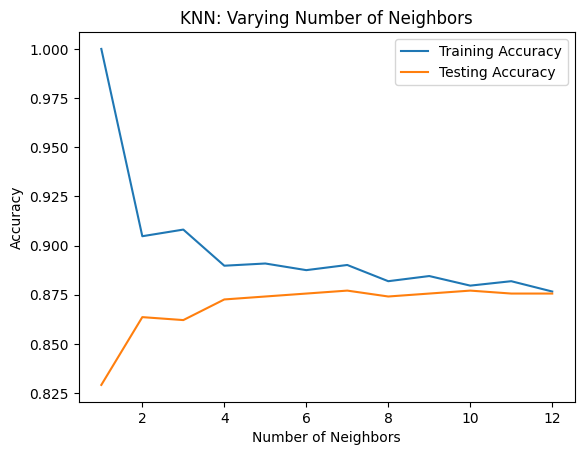

In [8]:
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


## Regression

_Regression_ is the task of predicting a continuous, numerical value based on a set of features.

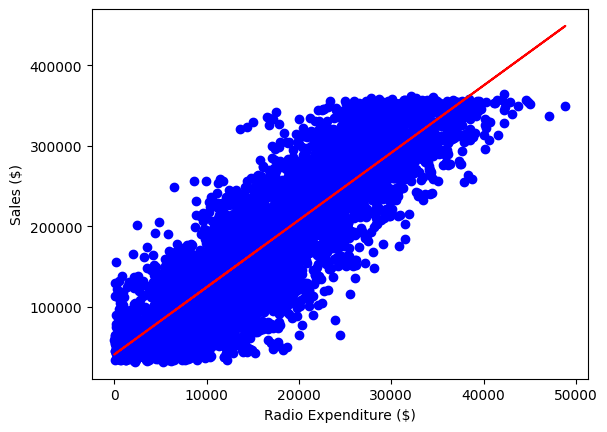

In [9]:
X = sales["radio"].values
y = sales["sales"].values

# reshape X
X = X.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X)

plt.scatter(X, y, color="blue")
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")
plt.show()


### Linear regression basics

_Simple linear regression_ is defined as:

$y = ax + b$

where $y$ is the target variable, $x$ is the feature, $a$ is the slope, and $b$ is the intercept.

The $a$ and $b$ parameters will graph a line that minimizes the _error function_.

The error function or _loss function_ is a measure of how well the model fits the data.

In [10]:
X = sales.drop("sales", axis=1).values
y = sales["sales"].values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"Predictions: {y_pred[:2]}, Actual Values: {y_test[:2]}")


Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


### Measuring regression performance

The _mean squared error_ (MSE) is the average of the squared differences between the predicted and actual values. The _root mean squared error_ (RMSE) is the square root of the MSE.

The <em>R<sup>2</sup></em> score is the proportion of the variance in the target variable that is explained by the model.

In [11]:
r_squared = reg.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2: {r_squared}")
print(f"RMSE: {rmse}")


R^2: 0.9990152104759368
RMSE: 2944.4331996001


### Cross-validation

_k-fold cross-validation_ is a technique used to evaluate a model's performance on unseen data. The data is split into $k$ folds, and the model is trained on $k-1$ folds and tested on the remaining fold. This process is repeated $k$ times, with each fold being used as the test set once. The average of the $k$ scores is the overall score of the model. If we use $k=5$, this is called _5-fold cross-validation_.


In [12]:
kf = KFold(n_splits=6, shuffle=True, random_state=5)
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=kf)

# print mean of `cv_scores`
print(np.mean(cv_scores))

# print standard deviation
print(np.std(cv_scores))

# print 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))


0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


### Regularization

_Regularization_ is a technique used to reduce overfitting. It does this by adding a penalty term to the loss function. The penalty term is a function of the model's parameters. The penalty term is zero when the parameters are zero, and increases as the parameters increase.

#### Ridge regression

_Ridge regression_ is a technique used to reduce overfitting by dealing with multicollinearity, a situation where two or more features are highly correlated.

The idea of Ridge regression is to alter the process of finding the best-fitting line by introducing a penalty for having coefficients that are too large, which often happens when the predictors are highly correlated. The resulting model might not fit the data as perfectly, but should perform better with data it hasn't seen before.

In [13]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # fit the data
    ridge.fit(X_train, y_train)

    # obtain r-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

print(ridge_scores)


[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]


#### LASSO regression

_Least Absolute Shrinkage and Selection Operator_ (LASSO) regression is a technique used to reduce overfitting by not only penalizing large coefficients, but actually driving some of them to zero. This effectively performs feature selection for you, by removing some features from the model entirely.

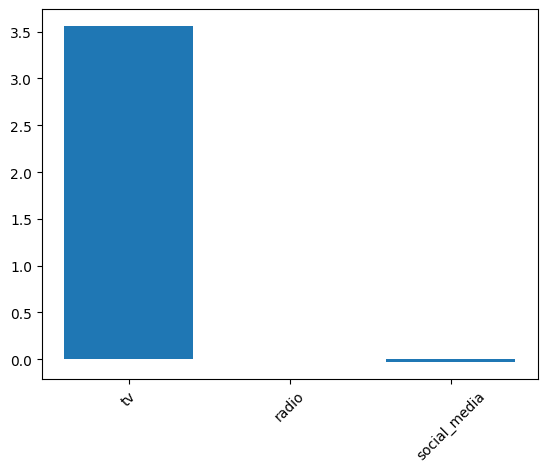

In [14]:
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

sales_columns = pd.Index(["tv", "radio", "social_media"])

plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()


## Fine-tuning

### Class imbalance

Imagine you are building a model to predict fraudulent bank transactions. If only 1% of bank transactions are fraudulent and your model predicts that all transactions are not fraudulent, your model would have a 99% accuracy but it wouldn't be useful at all. An uneven frequency of classes like this is _class imbalance_.

### Accuracy

_Accuracy_ is the proportion of correct predictions. It is calculated as:

$\frac{TP + TN}{TP + TN + FP + FN}$

where $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives, and $FN$ is the number of false negatives.

### Precision

_Precision_ is the proportion of positive identifications that were actually correct (true positives):

$\frac{TP}{TP + FP}$

### Recall

_Recall_ is the proportion of actual positives that were identified correctly (true positives):

$\frac{TP}{TP + FN}$

### F1 score

The _F1 score_ is the harmonic mean of precision and recall:

$2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$

#### Harmonic mean

The _harmonic mean_ is a type of average that is useful when dealing with rates or ratios, like speed or density, and you want a mean that accounts for the proportional impact of each value.

It is defined as the reciprocol of the mean of the reciprocals of the values. For a set of $n$ numbers $x_1, x_2, \ldots, x_n$, the harmonic mean $H$ is:

$H = \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + \ldots + \frac{1}{x_n}}$

### Confusion matrix

A _confusion matrix_ is a table that shows the number of correct and incorrect predictions made by a classification model.

<img src="confusion-matrix.jpg" width="600" alt="Confusion matrix diagram" />

> Source: [plat.ai](https://plat.ai/blog/confusion-matrix-in-machine-learning)

In [15]:
X = diabetes.drop("diabetes", axis=1).values
y = diabetes["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[124  27]
 [ 42  38]]


In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



### Logistic regression

_Logistic regression_ is a classification algorithm that is used when the target variable is binary (0 or 1). It is similar to linear regression, but instead of predicting a continuous value, it predicts the probability of an observation belonging to a certain class.

In [17]:
logreg = LogisticRegression(max_iter=250)
logreg.fit(X_train, y_train)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[:10])


[0.26652548 0.19012748 0.12363916 0.14568671 0.50468395 0.45332114
 0.01328234 0.5960586  0.56321996 0.79998119]


### ROC curve

The _Receiver Operating Characteristic_ (ROC) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) for different classification thresholds.

The _true positive rate_ is the proportion of actual positives that are correctly identified as such (recall). The _false positive rate_ is the proportion of actual negatives that are incorrectly identified as positives.

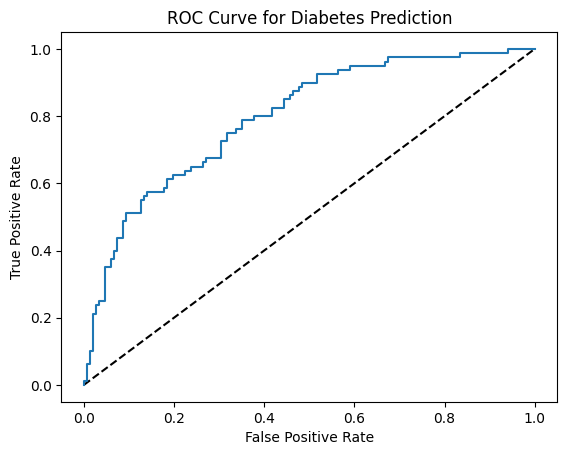

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# plot curve
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Diabetes Prediction")
plt.show()


#### ROC AUC score

The _ROC AUC score_ is the area under the ROC curve. It is a measure of how well a model can distinguish between classes. The higher the score, the better the model is at predicting the correct class.

In [19]:
print(roc_auc_score(y_test, y_pred_probs))


0.796523178807947


### Hyperparameter tuning

Parameters specified before training a model are _hyperparameters_. Tuning is the process of experimenting with different hyperparameter values to find the best performing model.

#### Grid search

_Grid search_ is a technique used to find the optimal hyperparameter values for a model. It works by creating a grid of all possible hyperparameter values, and then evaluating each combination of values. The combination of values that produces the best performing model is the optimal combination.

In [20]:
param_grid = {
    # 20 evenly-spaced values from 0.00001 to 1.0
    "alpha": np.linspace(0.00001, 1.0, 20)
}
lasso = Lasso()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)
lasso_cv.fit(X_train, y_train)
print(f"Tuned lasso parameters: {lasso_cv.best_params_}")
print(f"Tuned lasso score: {lasso_cv.best_score_}")


Tuned lasso parameters: {'alpha': 1e-05}
Tuned lasso score: 0.29604708033272703


#### Random search

Imagine you have 100 possible hyperparameter combinations and your model takes 2 minutes to train. With grid search that would take over 3 hours. If you were paying for cloud resources for training, this would get expensive quickly (and waste a ton of electricity).

Research has shown that _random search_ is more efficient than grid search ([Bergstra and Bengio, 2012](https://jmlr.org/papers/v13/bergstra12a.html)).

In [21]:
params = {
    "penalty": ["l2"],
    "tol": np.linspace(0.0001, 1.0, 50),
    "C": np.linspace(0.1, 1.0, 50),
    "class_weight": ["balanced", {0: 0.8, 1: 0.2}],
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
logreg = LogisticRegression(max_iter=250)
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)
logreg_cv.fit(X_train, y_train)
print(f"Tuned logreg parameters: {logreg_cv.best_params_}")
print(f"Tuned logreg score: {logreg_cv.best_score_}")


Tuned logreg parameters: {'tol': 0.5102530612244898, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.889795918367347}
Tuned logreg score: 0.7634129456559363


## Preprocessing and Pipelines

### Dummy variables

In [22]:
music_dummies = pd.get_dummies(music, drop_first=True)
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values
ridge = Ridge(alpha=0.2)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# score using negative mean squared error
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# calculate RMSE
rmse = np.sqrt(np.abs(scores))
print(f"Average RMSE: {np.mean(rmse)}")
print(f"Standard Deviation of the target array: {np.std(y)}")


Average RMSE: 8.236853840202299
Standard Deviation of the target array: 14.02156909907019


### Imputation

In [23]:
# remove values where less than 50 are missing
music = music.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# convert genre to binary feature where 1 is Rock and 0 is not Rock
music["genre"] = np.where(music["genre"] == "Rock", 1, 0)

imputer = SimpleImputer()
knn = KNeighborsClassifier(n_neighbors=3)
steps = [("imputer", imputer), ("knn", knn)]

X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))


[[45 50]
 [43 62]]


### Scaling

In [24]:
steps = [("scaler", StandardScaler()), ("lasso", Lasso(alpha=0.5))]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# calculate r-squared
print(pipeline.score(X_test, y_test))


-0.003916040100250706


In [25]:
steps = [("scaler", StandardScaler()), ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
print(cv.best_score_)
print(cv.best_params_)


0.8550000000000001
{'logreg__C': 0.1061578947368421}


### Visualizing regression performance

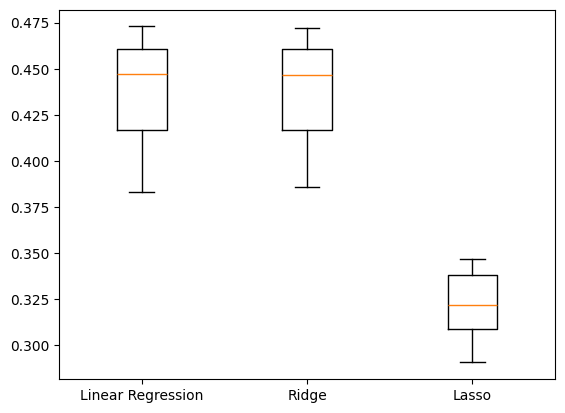

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1),
}

results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_scores)

plt.boxplot(results, labels=models.keys())
plt.show()


In [27]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge()}
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test Set MSE: {test_mse}")


Linear Regression Test Set MSE: 0.13229730450937846
Ridge Test Set MSE: 0.13228960938743659


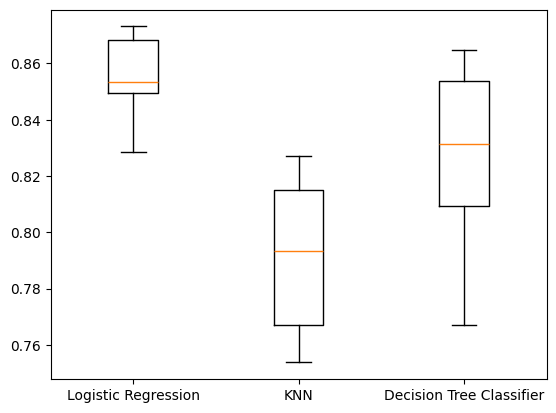

In [28]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
}

results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()


In [29]:
steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression()),
]
pipeline = Pipeline(steps)

params = {
    "logreg__solver": ["newton-cg", "saga", "lbfgs"],
    "logreg__C": np.linspace(0.001, 1.0, 10),
}
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)
print(
    f"Tuned Logistic Regression Parameters: {tuning.best_params_}, Accuracy: {tuning.score(X_test, y_test)}"
)


Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.86
